# Reading and Prepare Data


Install Libraries & Download the

- Open Neuro: `pip install openneuro-py`
- MNE: `pip install mne`


In [1]:
import numpy as np
import pandas as pd
import json
import os

import openneuro as on
import mne

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create folder to stored the dataset.
# Run this code when use colab
# !mkdir /content/dataset 
# output_dir = "/content/dataset"

# Set direction to store the dataset
output_dir = os.getcwd()+'/dataset'

# Downloading the dataset
dataset_id = "ds004504"

on.download(dataset=dataset_id, target_dir=output_dir)


👋 Hello! This is openneuro-py 2023.1.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds004504 …


📁 Traversing directories for ds004504 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 357 files (5 concurrent downloads). 
✅ Finished downloading ds004504.
 
🧠 Please enjoy your brains.
 


CHANGES:   0%|          | 0.00/327 [00:00<?, ?B/s]

participants.tsv:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

participants.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

README:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

dataset_description.json:   0%|          | 0.00/2.80k [00:00<?, ?B/s]

sub-002_task-eyesclosed_eeg.set:   0%|          | 0.00/30.7M [00:00<?, ?B/s]

sub-001_task-eyesclosed_eeg.set:   0%|          | 0.00/23.2M [00:00<?, ?B/s]

sub-003_task-eyesclosed_eeg.set:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

sub-004_task-eyesclosed_eeg.set:   0%|          | 0.00/28.7M [00:00<?, ?B/s]

sub-005_task-eyesclosed_eeg.set:   0%|          | 0.00/31.1M [00:00<?, ?B/s]

sub-006_task-eyesclosed_eeg.set:   0%|          | 0.00/25.7M [00:00<?, ?B/s]

sub-010_task-eyesclosed_eeg.set:   0%|          | 0.00/52.0M [00:00<?, ?B/s]

sub-009_task-eyesclosed_eeg.set:   0%|          | 0.00/24.9M [00:00<?, ?B/s]

sub-007_task-eyesclosed_eeg.set:   0%|          | 0.00/31.1M [00:00<?, ?B/s]

sub-008_task-eyesclosed_eeg.set:   0%|          | 0.00/32.2M [00:00<?, ?B/s]

sub-011_task-eyesclosed_eeg.set:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

sub-012_task-eyesclosed_eeg.set:   0%|          | 0.00/35.9M [00:00<?, ?B/s]

sub-014_task-eyesclosed_eeg.set:   0%|          | 0.00/37.9M [00:00<?, ?B/s]

sub-015_task-eyesclosed_eeg.set:   0%|          | 0.00/36.6M [00:00<?, ?B/s]

sub-013_task-eyesclosed_eeg.set:   0%|          | 0.00/34.0M [00:00<?, ?B/s]

sub-016_task-eyesclosed_eeg.set:   0%|          | 0.00/39.5M [00:00<?, ?B/s]

sub-017_task-eyesclosed_eeg.set:   0%|          | 0.00/34.2M [00:00<?, ?B/s]

sub-018_task-eyesclosed_eeg.set:   0%|          | 0.00/34.3M [00:00<?, ?B/s]

sub-019_task-eyesclosed_eeg.set:   0%|          | 0.00/37.3M [00:00<?, ?B/s]

sub-020_task-eyesclosed_eeg.set:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

sub-021_task-eyesclosed_eeg.set:   0%|          | 0.00/37.4M [00:00<?, ?B/s]

sub-022_task-eyesclosed_eeg.set:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

sub-023_task-eyesclosed_eeg.set:   0%|          | 0.00/33.9M [00:00<?, ?B/s]

sub-024_task-eyesclosed_eeg.set:   0%|          | 0.00/30.9M [00:00<?, ?B/s]

sub-025_task-eyesclosed_eeg.set:   0%|          | 0.00/27.8M [00:00<?, ?B/s]

sub-026_task-eyesclosed_eeg.set:   0%|          | 0.00/36.5M [00:00<?, ?B/s]

sub-027_task-eyesclosed_eeg.set:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

sub-029_task-eyesclosed_eeg.set:   0%|          | 0.00/29.9M [00:00<?, ?B/s]

sub-028_task-eyesclosed_eeg.set:   0%|          | 0.00/33.2M [00:00<?, ?B/s]

sub-030_task-eyesclosed_eeg.set:   0%|          | 0.00/22.5M [00:00<?, ?B/s]

sub-032_task-eyesclosed_eeg.set:   0%|          | 0.00/32.4M [00:00<?, ?B/s]

sub-033_task-eyesclosed_eeg.set:   0%|          | 0.00/28.7M [00:00<?, ?B/s]

sub-031_task-eyesclosed_eeg.set:   0%|          | 0.00/46.7M [00:00<?, ?B/s]

sub-034_task-eyesclosed_eeg.set:   0%|          | 0.00/39.4M [00:00<?, ?B/s]

sub-035_task-eyesclosed_eeg.set:   0%|          | 0.00/30.1M [00:00<?, ?B/s]

sub-036_task-eyesclosed_eeg.set:   0%|          | 0.00/34.2M [00:00<?, ?B/s]

sub-037_task-eyesclosed_eeg.set:   0%|          | 0.00/30.1M [00:00<?, ?B/s]

sub-039_task-eyesclosed_eeg.set:   0%|          | 0.00/34.5M [00:00<?, ?B/s]

sub-038_task-eyesclosed_eeg.set:   0%|          | 0.00/36.2M [00:00<?, ?B/s]

sub-040_task-eyesclosed_eeg.set:   0%|          | 0.00/39.2M [00:00<?, ?B/s]

sub-041_task-eyesclosed_eeg.set:   0%|          | 0.00/36.0M [00:00<?, ?B/s]

sub-042_task-eyesclosed_eeg.set:   0%|          | 0.00/39.1M [00:00<?, ?B/s]

sub-043_task-eyesclosed_eeg.set:   0%|          | 0.00/32.1M [00:00<?, ?B/s]

sub-044_task-eyesclosed_eeg.set:   0%|          | 0.00/34.1M [00:00<?, ?B/s]

sub-045_task-eyesclosed_eeg.set:   0%|          | 0.00/34.6M [00:00<?, ?B/s]

sub-046_task-eyesclosed_eeg.set:   0%|          | 0.00/30.6M [00:00<?, ?B/s]

sub-047_task-eyesclosed_eeg.set:   0%|          | 0.00/32.8M [00:00<?, ?B/s]

sub-048_task-eyesclosed_eeg.set:   0%|          | 0.00/40.2M [00:00<?, ?B/s]

sub-049_task-eyesclosed_eeg.set:   0%|          | 0.00/31.7M [00:00<?, ?B/s]

sub-050_task-eyesclosed_eeg.set:   0%|          | 0.00/33.2M [00:00<?, ?B/s]

sub-051_task-eyesclosed_eeg.set:   0%|          | 0.00/30.6M [00:00<?, ?B/s]

sub-053_task-eyesclosed_eeg.set:   0%|          | 0.00/31.7M [00:00<?, ?B/s]

sub-052_task-eyesclosed_eeg.set:   0%|          | 0.00/30.9M [00:00<?, ?B/s]

sub-054_task-eyesclosed_eeg.set:   0%|          | 0.00/34.0M [00:00<?, ?B/s]

sub-055_task-eyesclosed_eeg.set:   0%|          | 0.00/33.1M [00:00<?, ?B/s]

sub-056_task-eyesclosed_eeg.set:   0%|          | 0.00/32.2M [00:00<?, ?B/s]

sub-060_task-eyesclosed_eeg.set:   0%|          | 0.00/30.4M [00:00<?, ?B/s]

sub-058_task-eyesclosed_eeg.set:   0%|          | 0.00/30.7M [00:00<?, ?B/s]

sub-057_task-eyesclosed_eeg.set:   0%|          | 0.00/30.8M [00:00<?, ?B/s]

sub-059_task-eyesclosed_eeg.set:   0%|          | 0.00/32.0M [00:00<?, ?B/s]

sub-061_task-eyesclosed_eeg.set:   0%|          | 0.00/32.6M [00:00<?, ?B/s]

sub-063_task-eyesclosed_eeg.set:   0%|          | 0.00/32.7M [00:00<?, ?B/s]

sub-064_task-eyesclosed_eeg.set:   0%|          | 0.00/34.4M [00:00<?, ?B/s]

sub-062_task-eyesclosed_eeg.set:   0%|          | 0.00/36.5M [00:00<?, ?B/s]

sub-065_task-eyesclosed_eeg.set:   0%|          | 0.00/34.2M [00:00<?, ?B/s]

sub-066_task-eyesclosed_eeg.set:   0%|          | 0.00/22.3M [00:00<?, ?B/s]

sub-067_task-eyesclosed_eeg.set:   0%|          | 0.00/24.9M [00:00<?, ?B/s]

sub-068_task-eyesclosed_eeg.set:   0%|          | 0.00/23.3M [00:00<?, ?B/s]

sub-069_task-eyesclosed_eeg.set:   0%|          | 0.00/25.8M [00:00<?, ?B/s]

sub-070_task-eyesclosed_eeg.set:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

sub-071_task-eyesclosed_eeg.set:   0%|          | 0.00/25.2M [00:00<?, ?B/s]

sub-072_task-eyesclosed_eeg.set:   0%|          | 0.00/26.7M [00:00<?, ?B/s]

sub-075_task-eyesclosed_eeg.set:   0%|          | 0.00/30.4M [00:00<?, ?B/s]

sub-073_task-eyesclosed_eeg.set:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

sub-074_task-eyesclosed_eeg.set:   0%|          | 0.00/41.2M [00:00<?, ?B/s]

sub-076_task-eyesclosed_eeg.set:   0%|          | 0.00/31.7M [00:00<?, ?B/s]

sub-077_task-eyesclosed_eeg.set:   0%|          | 0.00/28.4M [00:00<?, ?B/s]

sub-079_task-eyesclosed_eeg.set:   0%|          | 0.00/33.2M [00:00<?, ?B/s]

sub-080_task-eyesclosed_eeg.set:   0%|          | 0.00/37.2M [00:00<?, ?B/s]

sub-078_task-eyesclosed_eeg.set:   0%|          | 0.00/35.4M [00:00<?, ?B/s]

sub-082_task-eyesclosed_eeg.set:   0%|          | 0.00/30.1M [00:00<?, ?B/s]

sub-081_task-eyesclosed_eeg.set:   0%|          | 0.00/33.5M [00:00<?, ?B/s]

sub-084_task-eyesclosed_eeg.set:   0%|          | 0.00/25.2M [00:00<?, ?B/s]

sub-083_task-eyesclosed_eeg.set:   0%|          | 0.00/35.3M [00:00<?, ?B/s]

sub-085_task-eyesclosed_eeg.set:   0%|          | 0.00/22.8M [00:00<?, ?B/s]

sub-086_task-eyesclosed_eeg.set:   0%|          | 0.00/23.6M [00:00<?, ?B/s]

sub-087_task-eyesclosed_eeg.set:   0%|          | 0.00/24.5M [00:00<?, ?B/s]

sub-001_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-088_task-eyesclosed_eeg.set:   0%|          | 0.00/31.9M [00:00<?, ?B/s]

sub-001_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-001_task-eyesclosed_eeg.set:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

sub-002_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-002_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-002_task-eyesclosed_eeg.set:   0%|          | 0.00/30.3M [00:00<?, ?B/s]

sub-003_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-003_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-003_task-eyesclosed_eeg.set:   0%|          | 0.00/11.8M [00:00<?, ?B/s]

sub-004_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-004_task-eyesclosed_eeg.set:   0%|          | 0.00/27.0M [00:00<?, ?B/s]

sub-004_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-005_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-005_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-006_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-005_task-eyesclosed_eeg.set:   0%|          | 0.00/30.7M [00:00<?, ?B/s]

sub-006_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-006_task-eyesclosed_eeg.set:   0%|          | 0.00/24.3M [00:00<?, ?B/s]

sub-007_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-008_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-007_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-007_task-eyesclosed_eeg.set:   0%|          | 0.00/29.4M [00:00<?, ?B/s]

sub-008_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-008_task-eyesclosed_eeg.set:   0%|          | 0.00/30.5M [00:00<?, ?B/s]

sub-009_task-eyesclosed_eeg.set:   0%|          | 0.00/23.5M [00:00<?, ?B/s]

sub-009_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-009_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-010_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-010_task-eyesclosed_eeg.json:   0%|          | 0.00/869 [00:00<?, ?B/s]

sub-011_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-010_task-eyesclosed_eeg.set:   0%|          | 0.00/49.3M [00:00<?, ?B/s]

sub-011_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-011_task-eyesclosed_eeg.set:   0%|          | 0.00/29.5M [00:00<?, ?B/s]

sub-012_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-012_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-013_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-012_task-eyesclosed_eeg.set:   0%|          | 0.00/34.3M [00:00<?, ?B/s]

sub-013_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-013_task-eyesclosed_eeg.set:   0%|          | 0.00/32.1M [00:00<?, ?B/s]

sub-014_task-eyesclosed_eeg.set:   0%|          | 0.00/36.1M [00:00<?, ?B/s]

sub-014_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-014_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-015_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-015_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-015_task-eyesclosed_eeg.set:   0%|          | 0.00/34.8M [00:00<?, ?B/s]

sub-016_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-016_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-016_task-eyesclosed_eeg.set:   0%|          | 0.00/37.6M [00:00<?, ?B/s]

sub-017_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-017_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-018_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-017_task-eyesclosed_eeg.set:   0%|          | 0.00/32.4M [00:00<?, ?B/s]

sub-018_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-018_task-eyesclosed_eeg.set:   0%|          | 0.00/32.4M [00:00<?, ?B/s]

sub-019_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-019_task-eyesclosed_eeg.set:   0%|          | 0.00/35.2M [00:00<?, ?B/s]

sub-019_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-020_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-020_task-eyesclosed_eeg.set:   0%|          | 0.00/33.2M [00:00<?, ?B/s]

sub-020_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-021_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-021_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-021_task-eyesclosed_eeg.set:   0%|          | 0.00/35.3M [00:00<?, ?B/s]

sub-022_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-022_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-023_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-023_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-022_task-eyesclosed_eeg.set:   0%|          | 0.00/31.5M [00:00<?, ?B/s]

sub-023_task-eyesclosed_eeg.set:   0%|          | 0.00/33.0M [00:00<?, ?B/s]

sub-024_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-024_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-024_task-eyesclosed_eeg.set:   0%|          | 0.00/29.3M [00:00<?, ?B/s]

sub-025_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-025_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-025_task-eyesclosed_eeg.set:   0%|          | 0.00/26.7M [00:00<?, ?B/s]

sub-026_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-026_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-026_task-eyesclosed_eeg.set:   0%|          | 0.00/35.0M [00:00<?, ?B/s]

sub-027_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-027_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-027_task-eyesclosed_eeg.set:   0%|          | 0.00/31.7M [00:00<?, ?B/s]

sub-028_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-028_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-028_task-eyesclosed_eeg.set:   0%|          | 0.00/31.6M [00:00<?, ?B/s]

sub-029_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-029_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-029_task-eyesclosed_eeg.set:   0%|          | 0.00/28.3M [00:00<?, ?B/s]

sub-030_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-030_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-030_task-eyesclosed_eeg.set:   0%|          | 0.00/21.3M [00:00<?, ?B/s]

sub-031_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-031_task-eyesclosed_eeg.set:   0%|          | 0.00/44.2M [00:00<?, ?B/s]

sub-031_task-eyesclosed_eeg.json:   0%|          | 0.00/869 [00:00<?, ?B/s]

sub-032_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-032_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-032_task-eyesclosed_eeg.set:   0%|          | 0.00/32.7M [00:00<?, ?B/s]

sub-033_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-033_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-033_task-eyesclosed_eeg.set:   0%|          | 0.00/27.0M [00:00<?, ?B/s]

sub-034_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-034_task-eyesclosed_eeg.set:   0%|          | 0.00/37.1M [00:00<?, ?B/s]

sub-034_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-035_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-035_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-035_task-eyesclosed_eeg.set:   0%|          | 0.00/28.9M [00:00<?, ?B/s]

sub-036_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-036_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-036_task-eyesclosed_eeg.set:   0%|          | 0.00/32.6M [00:00<?, ?B/s]

sub-037_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-037_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-037_task-eyesclosed_eeg.set:   0%|          | 0.00/29.7M [00:00<?, ?B/s]

sub-038_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-038_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-038_task-eyesclosed_eeg.set:   0%|          | 0.00/34.2M [00:00<?, ?B/s]

sub-039_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-039_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-040_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-039_task-eyesclosed_eeg.set:   0%|          | 0.00/32.7M [00:00<?, ?B/s]

sub-040_task-eyesclosed_eeg.json:   0%|          | 0.00/869 [00:00<?, ?B/s]

sub-040_task-eyesclosed_eeg.set:   0%|          | 0.00/38.8M [00:00<?, ?B/s]

sub-041_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-041_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-041_task-eyesclosed_eeg.set:   0%|          | 0.00/33.9M [00:00<?, ?B/s]

sub-042_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-042_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-043_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-042_task-eyesclosed_eeg.set:   0%|          | 0.00/37.2M [00:00<?, ?B/s]

sub-043_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-043_task-eyesclosed_eeg.set:   0%|          | 0.00/31.7M [00:00<?, ?B/s]

sub-044_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-044_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-044_task-eyesclosed_eeg.set:   0%|          | 0.00/33.7M [00:00<?, ?B/s]

sub-045_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-045_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-045_task-eyesclosed_eeg.set:   0%|          | 0.00/33.0M [00:00<?, ?B/s]

sub-046_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-046_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-046_task-eyesclosed_eeg.set:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

sub-047_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-047_task-eyesclosed_eeg.json:   0%|          | 0.00/866 [00:00<?, ?B/s]

sub-047_task-eyesclosed_eeg.set:   0%|          | 0.00/30.9M [00:00<?, ?B/s]

sub-048_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-048_task-eyesclosed_eeg.json:   0%|          | 0.00/869 [00:00<?, ?B/s]

sub-049_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-048_task-eyesclosed_eeg.set:   0%|          | 0.00/38.7M [00:00<?, ?B/s]

sub-049_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-049_task-eyesclosed_eeg.set:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

sub-050_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-050_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-050_task-eyesclosed_eeg.set:   0%|          | 0.00/31.6M [00:00<?, ?B/s]

sub-051_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-051_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-051_task-eyesclosed_eeg.set:   0%|          | 0.00/30.1M [00:00<?, ?B/s]

sub-052_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-052_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-053_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-052_task-eyesclosed_eeg.set:   0%|          | 0.00/29.1M [00:00<?, ?B/s]

sub-053_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-053_task-eyesclosed_eeg.set:   0%|          | 0.00/30.5M [00:00<?, ?B/s]

sub-054_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-054_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-054_task-eyesclosed_eeg.set:   0%|          | 0.00/32.2M [00:00<?, ?B/s]

sub-055_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-055_task-eyesclosed_eeg.json:   0%|          | 0.00/866 [00:00<?, ?B/s]

sub-055_task-eyesclosed_eeg.set:   0%|          | 0.00/31.5M [00:00<?, ?B/s]

sub-056_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-056_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-056_task-eyesclosed_eeg.set:   0%|          | 0.00/33.8M [00:00<?, ?B/s]

sub-057_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-057_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-058_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-057_task-eyesclosed_eeg.set:   0%|          | 0.00/30.4M [00:00<?, ?B/s]

sub-058_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-058_task-eyesclosed_eeg.set:   0%|          | 0.00/29.1M [00:00<?, ?B/s]

sub-059_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-059_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-059_task-eyesclosed_eeg.set:   0%|          | 0.00/30.2M [00:00<?, ?B/s]

sub-060_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-060_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-060_task-eyesclosed_eeg.set:   0%|          | 0.00/28.7M [00:00<?, ?B/s]

sub-061_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-061_task-eyesclosed_eeg.set:   0%|          | 0.00/30.8M [00:00<?, ?B/s]

sub-061_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-062_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-062_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-063_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-062_task-eyesclosed_eeg.set:   0%|          | 0.00/34.8M [00:00<?, ?B/s]

sub-063_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-063_task-eyesclosed_eeg.set:   0%|          | 0.00/30.9M [00:00<?, ?B/s]

sub-064_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-064_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-064_task-eyesclosed_eeg.set:   0%|          | 0.00/32.4M [00:00<?, ?B/s]

sub-065_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-065_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-065_task-eyesclosed_eeg.set:   0%|          | 0.00/33.8M [00:00<?, ?B/s]

sub-066_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-066_task-eyesclosed_eeg.set:   0%|          | 0.00/21.1M [00:00<?, ?B/s]

sub-066_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-067_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-067_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-067_task-eyesclosed_eeg.set:   0%|          | 0.00/24.6M [00:00<?, ?B/s]

sub-068_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-068_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-068_task-eyesclosed_eeg.set:   0%|          | 0.00/21.9M [00:00<?, ?B/s]

sub-069_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-069_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-070_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-069_task-eyesclosed_eeg.set:   0%|          | 0.00/24.3M [00:00<?, ?B/s]

sub-070_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-070_task-eyesclosed_eeg.set:   0%|          | 0.00/18.3M [00:00<?, ?B/s]

sub-071_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-071_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-072_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-071_task-eyesclosed_eeg.set:   0%|          | 0.00/23.8M [00:00<?, ?B/s]

sub-072_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-072_task-eyesclosed_eeg.set:   0%|          | 0.00/25.3M [00:00<?, ?B/s]

sub-073_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-073_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-073_task-eyesclosed_eeg.set:   0%|          | 0.00/32.8M [00:00<?, ?B/s]

sub-074_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-074_task-eyesclosed_eeg.json:   0%|          | 0.00/869 [00:00<?, ?B/s]

sub-075_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-074_task-eyesclosed_eeg.set:   0%|          | 0.00/41.2M [00:00<?, ?B/s]

sub-075_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-075_task-eyesclosed_eeg.set:   0%|          | 0.00/28.7M [00:00<?, ?B/s]

sub-076_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-076_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-077_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-076_task-eyesclosed_eeg.set:   0%|          | 0.00/31.3M [00:00<?, ?B/s]

sub-077_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-077_task-eyesclosed_eeg.set:   0%|          | 0.00/26.9M [00:00<?, ?B/s]

sub-078_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-078_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-078_task-eyesclosed_eeg.set:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

sub-079_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-079_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-079_task-eyesclosed_eeg.set:   0%|          | 0.00/31.5M [00:00<?, ?B/s]

sub-080_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-080_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-080_task-eyesclosed_eeg.set:   0%|          | 0.00/35.6M [00:00<?, ?B/s]

sub-081_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-081_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-081_task-eyesclosed_eeg.set:   0%|          | 0.00/31.7M [00:00<?, ?B/s]

sub-082_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-082_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-083_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-082_task-eyesclosed_eeg.set:   0%|          | 0.00/29.7M [00:00<?, ?B/s]

sub-083_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-083_task-eyesclosed_eeg.set:   0%|          | 0.00/34.9M [00:00<?, ?B/s]

sub-084_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-084_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-084_task-eyesclosed_eeg.set:   0%|          | 0.00/24.9M [00:00<?, ?B/s]

sub-085_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-085_task-eyesclosed_eeg.set:   0%|          | 0.00/21.6M [00:00<?, ?B/s]

sub-086_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-085_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-086_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-087_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-086_task-eyesclosed_eeg.set:   0%|          | 0.00/25.1M [00:00<?, ?B/s]

sub-087_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-088_task-eyesclosed_channels.tsv:   0%|          | 0.00/284 [00:00<?, ?B/s]

sub-087_task-eyesclosed_eeg.set:   0%|          | 0.00/23.2M [00:00<?, ?B/s]

sub-088_task-eyesclosed_eeg.json:   0%|          | 0.00/868 [00:00<?, ?B/s]

sub-088_task-eyesclosed_eeg.set:   0%|          | 0.00/30.3M [00:00<?, ?B/s]

Read the Data


In [4]:
filename_part = '/content/dataset/participants.tsv'
df_partipants = pd.read_csv(filename_part, sep='\t')
df_partipants.head()

,participant_id,Gender,Age,Group,MMSE
0,sub-001,F,57,A,16
1,sub-002,F,78,A,22
2,sub-003,M,70,A,14
3,sub-004,F,67,A,20
4,sub-005,M,70,A,22


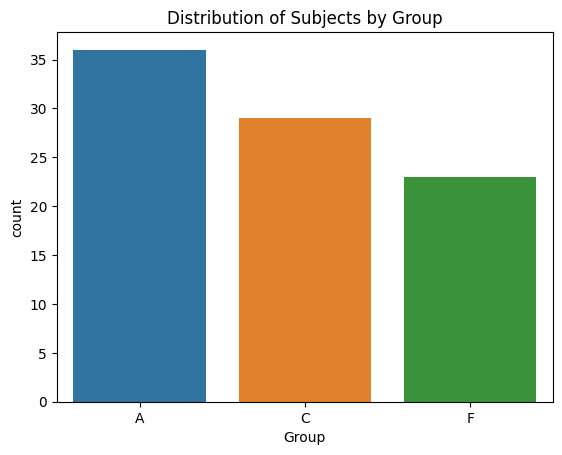

In [5]:
sns.countplot(x=df_partipants["Group"])
plt.title('Distribution of Subjects by Group')
plt.show()

In [6]:
%cd '/content/dataset/derivatives'
dir_list = [f for f in os.listdir() if os.path.isdir(os.path.join('.', f))]
dir_list.sort()
print(len(dir_list))
print(dir_list[:5])

/content/dataset/derivatives
88
['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005']


In [7]:
eeg_data = []

for l in dir_list:
  folder = '/content/dataset/derivatives/'+l+'/eeg/'
  f = l+'_task-eyesclosed_eeg.set'
  #print(l)
  r = mne.io.read_raw_eeglab(folder+f, preload=False, verbose='CRITICAL')
  participant_info = {'id': l}
  r.info['subject_info'] = participant_info
  eeg_data.append(r)

print('EEG Files Loaded:',len(eeg_data))

EEG Files Loaded: 88


## Preselect Datasets


Show Maximum Time Distribution.


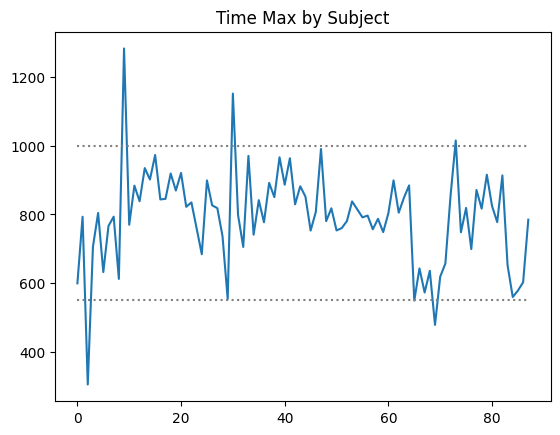

In [8]:
time_max = []

for r in eeg_data:
  time_max.append(r.tmax)

const_min = np.full(len(eeg_data),550)
const_max = np.full(len(eeg_data),1000)

plt.plot(time_max)
plt.plot(const_min, linestyle='dotted', c='gray')
plt.plot(const_max, linestyle='dotted', c='gray')

plt.title('Time Max by Subject')
plt.show()

Select Alzheimer and Fronto Temporal Dementia Subjects from Participants Info


In [43]:
df_ad_ftd = df_partipants[df_partipants['Group'].isin(['A','F'])]
len(df_ad_ftd)

59

Filtering Subjects with raw data between 550 and 1000 seconds.


In [58]:
eeg_data_filtered = []
list_participants_id = []

for r in eeg_data:
  # filtering only Alzheimer and Fronto Temporal Dementia subjects
  if r.info['subject_info']['id'] in df_ad_ftd['participant_id'].tolist():
    # filtering Outliers based in the tmax
    if r.tmax > 550 and r.tmax < 1000:
      eeg_data_filtered.append(r)
      list_participants_id.append(r.info['subject_info']['id'])

# Update Participants Info
df_ad_ftd = df_ad_ftd[df_ad_ftd['participant_id'].isin(list_participants_id)]

# Encoding Gender, Groups (Classes)
gender_dict = {'M':0, 'F':1}
group_dict = {'A':0, 'F':1}
df_ad_ftd['Gender'].replace(gender_dict, inplace=True)
df_ad_ftd['Group'].replace(group_dict, inplace=True)

print('Participants Info:',len(df_ad_ftd))
print('EEG Data Subjects:',len(eeg_data_filtered))
df_ad_ftd.head()

Participants Info: 53
EEG Data Subjects: 53


,participant_id,Gender,Age,Group,MMSE
0,sub-001,1,57,0,16
1,sub-002,1,78,0,22
3,sub-004,1,67,0,20
4,sub-005,0,70,0,22
5,sub-006,1,61,0,14


# Feature Extraction


Epochs for Channel Fp1


In [59]:
start_time = 0
end_time = 550

channels_to_pick = ['Fp1']

duration = 60.0
overlapping = 20.0

epochs_list = []

for raw in eeg_data_filtered:
  ep = mne.make_fixed_length_epochs(raw.copy().pick(channels_to_pick).crop(tmin=start_time, tmax=end_time),
                                    duration=duration, overlap=overlapping, preload=False, verbose='CRITICAL')
  epochs_list.append(ep)

print('Epochs created:', len(epochs_list))

Epochs created: 53


Using data from preloaded Raw for 13 events and 30000 original time points ...
0 bad epochs dropped
Not setting metadata
13 matching events found
No baseline correction applied
0 projection items activated


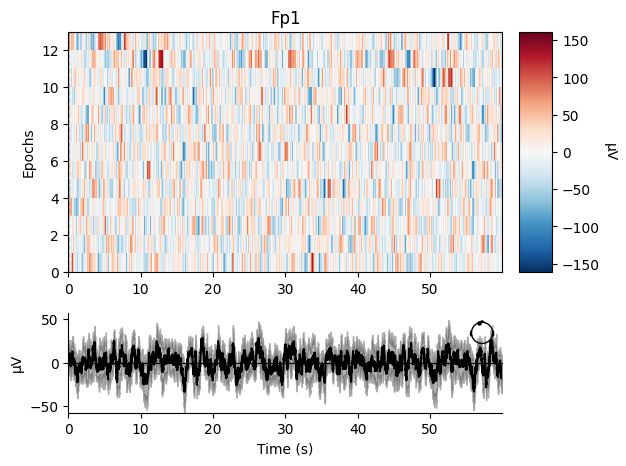

In [60]:
fig = epochs_list[0].plot_image(picks=["Fp1"])
plt.show()

In [68]:
df_ad_ftd.loc[1][['Gender','Age','MMSE','Group']].values

array([1, 78, 22, 0], dtype=object)

In [92]:
# Get features from Epochs (epochs)
features = []
for i, epoch in enumerate(epochs_list):
  epoch_features = epoch.get_data().reshape(13,30000)
  additional_data = df_ad_ftd.loc[i][['Gender','Age','MMSE','Group']].values
  features.append([epoch_features,additional_data])

# Adding external features (Age, Gender, Class)
'''features_combined = []
for i, epoch_features in enumerate(features):
  additional_data = df_ad_ftd.loc[i][['Gender','Age','MMSE','Group']].values
  comb_feat_add_data = np.stack((epoch_features, additional_data))
  features_combined.append(comb_feat_add_data)'''

concatenated_features = np.concatenate(features, axis=0)
concatenated_features.shape

Using data from preloaded Raw for 13 events and 30000 original time points ...
Using data from preloaded Raw for 13 events and 30000 original time points ...
Using data from preloaded Raw for 13 events and 30000 original time points ...


KeyError: ignored

---
